# Практическая работа №5 
## Тема: «Логистическая регрессия»
### Выполнил студент: Абрамов Руслан Закирович
#### ВАРИАНТ: 1 [Heart Disease Dataset](https://github.com/TheLilLilith/SystemAI-Abramov_Ruslan/blob/main/Datasets/heart_disease.xlsx)


Линейная регрессия и логистическая регрессия являются двумя популярными статистическими методами, используемыми для анализа данных. Они оба используются для прогнозирования значений на основе набора входных данных, но они применяются в разных контекстах и имеют разные цели.


### Логистическая регрессия

Простейший алгоритм классификации, пришел к нам из мира статистики. Позволяет разделять на два класса несложные объекты, чье состояние управляется и описывается небольшим числом параметров.

Логистическая регрессия выдает ответ в виде числа в промежутке от 0 до 1. Если число ниже определенного порога значения — то объект относится к первому классу объектов, а если выше — то ко второму. Калибровка порогового значения для разделения объектов на классы подбирается в ходе калибровки алгоритма.Логистическая регрессия, с другой стороны, используется для прогнозирования вероятности возникновения события на основе одного или нескольких независимых переменных. Она строит логистическую кривую, которая представляет собой S-образную кривую, используемую для моделирования вероятности.

**Основные характеристики логистической регрессии:**

- **Цель:** Прогнозирование вероятности возникновения события.
- **Модель:** Логистическая функция независимых переменных.
- **Применение:** Там, где требуется несложная классификация малого числа объектов на малое число классов. Используется в статистике, экономике, социологии и других областях для прогнозирования вероятности.

- **Плюсы.** Скорость и наглядность.

- **Минусы.** Может классифицировать только относительно простые объекты. Не подходит для разделения объектов на несколько классов, ответ этого алгоритма — по сути, двоичный сигнал типа «да-нет».

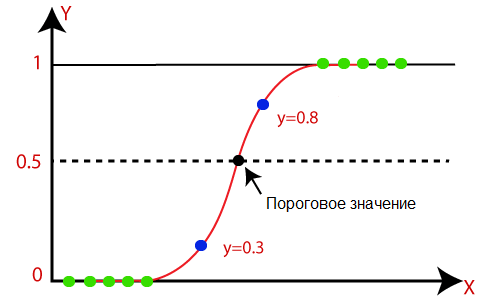




### Отличия

1. **Цель прогнозирования:** Линейная регрессия предназначена для прогнозирования непрерывных значений, в то время как логистическая регрессия используется для прогнозирования вероятности возникновения события.

2. **Функция модели:** Линейная регрессия использует линейную функцию для моделирования, в то время как логистическая регрессия использует логистическую функцию.

3. **Применение:** Линейная регрессия широко используется в различных областях для прогнозирования непрерывных переменных, в то время как логистическая регрессия часто используется в статистике и социологии для прогнозирования вероятности.

4. **Результаты:** Линейная регрессия дает прямое значение зависимой переменной, в то время как логистическая регрессия дает вероятность, что событие произойдет.

Выбор между линейной и логистической регрессией зависит от целей анализа и типа данных, с которыми вы работаете.

В контексте машинного обучения, логистическая регрессия часто используется для бинарной классификации, где цель состоит в том, чтобы предсказать, к какой из двух групп относится объект.

Пример Применения Логистической Регрессии на Датасете Титаник Для примера применения логистической регрессии на датасете Титаник, мы можем попытаться предсказать, выживет ли пассажир на Титанике на основе таких признаков, как пол, возраст, класс пассажира и другие.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Загрузка данных
#data = pd.read_csv('titanic.csv')

# Загрузка датасета
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Обработка пропущенных значений
#data = data.dropna()
data.Age = data.Age.fillna(data.Age.mean())

# Выбор признаков
features = data[['Pclass', 'Age', 'Sex']]
target = data['Survived']

In [3]:
features

,Pclass,Age,Sex
0,3,22.000000,male
1,1,38.000000,female
2,3,26.000000,female
3,1,35.000000,female
4,3,35.000000,male
...,...,...,...
886,2,27.000000,male
887,1,19.000000,female
888,3,29.699118,female
889,1,26.000000,male


<Axes: >

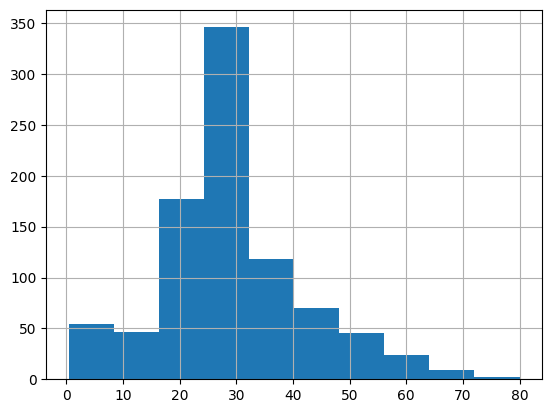

In [4]:
features.Age.hist()

In [5]:
gender_mapping = {'male': 0, 'female': 1}

#features = features['Sex'].replace(gender_mapping)
features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})

C:\Users\user\AppData\Local\Temp\ipykernel_5216\2431505523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})


In [6]:
features

,Pclass,Age,Sex
0,3,22.000000,0
1,1,38.000000,1
2,3,26.000000,1
3,1,35.000000,1
4,3,35.000000,0
...,...,...,...
886,2,27.000000,0
887,1,19.000000,1
888,3,29.699118,1
889,1,26.000000,0


In [7]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Создание и обучение модели
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [9]:
# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Этот пример демонстрирует базовый процесс применения логистической регрессии для бинарной классификации на датасете Титаник. Важно отметить, что выбор признаков и их преобразование могут сильно влиять на результаты модели, поэтому важно проводить эксперименты с различными наборами признаков и методами их обработки.

**Задача**

Определить с какой вероятностью выживет пассажир возростом 25 лет

Для решения этой задачи мы будем использовать библиотеку pandas для работы с данными, numpy для математических операций, и sklearn для построения и оценки модели логистической регрессии. В качестве примера датасета мы будем использовать датасет Titanic, который доступен в библиотеке seaborn.

Установка необходимых библиотек: 

Если у вас еще не установлены необходимые библиотеки, вы можете установить их с помощью команды pip install pandas numpy seaborn sklearn.

Загрузка и подготовка данных: Загрузим датасет Titanic, отфильтруем его, чтобы оставить только пассажиров возрастом 25 лет, и подготовим данные для обучения модели.
Построение и обучение модели: Используем логистическую регрессию из sklearn для обучения модели на подготовленных данных.
Оценка модели: Оценим качество модели, используя тестовые данные.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Загрузка датасета Titanic
titanic = sns.load_dataset('titanic')

# Фильтрация данных для пассажиров возрастом 25 лет
titanic_25 = titanic[titanic['age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X = titanic_25[['pclass', 'sex', 'embarked']].dropna()
y = titanic_25['survived']

# Преобразование категориальных переменных в числовые
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['embarked'] = X['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy}")


Accuracy (выживет с вероятносью:): 0.8


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')


from sklearn.metrics import classification_report, confusion_matrix

# Загрузка датасета Titanic
titanic = sns.load_dataset('titanic')

# Фильтрация данных для пассажиров возрастом 25 лет
titanic_25 = titanic[titanic['age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X = titanic_25[['pclass', 'sex', 'embarked', 'fare']].dropna()
y = titanic_25['survived']

# Преобразование категориальных переменных в числовые
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['embarked'] = X['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
#X['alone'] = X['alone'].map({False: 0, True: 1})

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



#### Задание 1. Загрузить данные из dataset "Титаник" 

In [12]:
import pandas as pd
df = pd.read_excel("Titanic_Dataset.xlsx",sheet_name='Titanic-Dataset')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Задание 2. Произвести предобработку данных dataset "Титаник" и сохранить результаты каждый в отдельный датафрейм
1. Удалить все путые заначения и сохранить результаты в датафрейм df_del
2. Замена на конкретное значение все путые  и сохранить результаты в датафрейм df_num
3. Заменить все путые заначения на среднее значение и сохранить результаты в датафрейм df_means
4. Заменить все путые заначения на медеанные значение и сохранить результаты в датафрейм df_medians
5. Замена на предыдущее или следующее значение и сохранить результаты в датафрейм df_fb_fill

In [13]:
# 2.1 Удалить все пустые заначения и сохранить результаты в датафрейм df_del
df_del = df.dropna()
df_del

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [14]:
# 2.2 Замена на конкретное значение все пуcтые и сохранить результаты в датафрейм df_num

df_num = df.fillna(45)
df_num

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,45,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,45,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,45,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,45,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,45.0,1,2,W./C. 6607,23.4500,45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
# 2.3 Заменить все пустые заначения на среднее значение и сохранить результаты в датафрейм df_means

df_means = df.fillna(df['Age'].mean())
df_means

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,29.699118,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,29.699118,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,29.699118,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [16]:
# 2.4 Заменить все пустые значения на медианные значения и сохранить результаты в датафрейм df_medians

df_medians = df.fillna(df['Age'].median())
df_medians

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,28.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,28.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,28.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,28.0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,28.0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
# 2.5 Замена на предыдущее или следующее значение и сохранить результаты в датафрейм df_fb_fill

df_fb_fill = df.ffill()
df_fb_fill

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Задание 3. Применить к каждому датафрейму алгоритм логистической регресси

In [18]:
# 3.1 df_del

# Фильтрация данных для пассажиров возрастом 25 лет
df_del_25 = df_del[df_del['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X_del = df_del_25[['Pclass', 'Sex', 'Embarked']]
y_del = df_del_25['Survived']

# Преобразование категориальных переменных в числовые
X_del['Sex'] = X_del['Sex'].map({'male': 0, 'female': 1})
X_del['Embarked'] = X_del['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X_del_train, X_del_test, y_del_train, y_del_test = train_test_split(X_del, y_del, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_del_train, y_del_train)

# Предсказание на тестовых данных
y_del_pred = model.predict(X_del_test)

In [19]:
# 3.2 df_num

# Фильтрация данных для пассажиров возрастом 25 лет
df_num_25 = df_num[df_num['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X_num = df_num_25[['Pclass', 'Sex', 'Embarked']]
y_num = df_num_25['Survived']

# Преобразование категориальных переменных в числовые
X_num['Sex'] = X_num['Sex'].map({'male': 0, 'female': 1})
X_num['Embarked'] = X_num['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num, y_num, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_num_train, y_num_train)

# Предсказание на тестовых данных
y_num_pred = model.predict(X_num_test)

In [20]:
# 3.3 df_means

# Фильтрация данных для пассажиров возрастом 25 лет
df_means_25 = df_means[df_means['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X_means = df_means_25[['Pclass', 'Sex', 'Embarked']]
y_means = df_means_25['Survived']

# Преобразование категориальных переменных в числовые
X_means['Sex'] = X_means['Sex'].map({'male': 0, 'female': 1})
X_means['Embarked'] = X_means['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X_means_train, X_means_test, y_means_train, y_means_test = train_test_split(X_means, y_means, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_means_train, y_means_train)

# Предсказание на тестовых данных
y_means_pred = model.predict(X_means_test)

In [21]:
# 3.4 df_medians

# Фильтрация данных для пассажиров возрастом 25 лет
df_medians_25 = df_medians[df_medians['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X_medians = df_medians_25[['Pclass', 'Sex', 'Embarked']]
y_medians = df_medians_25['Survived']

# Преобразование категориальных переменных в числовые
X_medians['Sex'] = X_medians['Sex'].map({'male': 0, 'female': 1})
X_medians['Embarked'] = X_medians['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X_medians_train, X_medians_test, y_medians_train, y_medians_test = train_test_split(X_medians, y_medians, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_medians_train, y_medians_train)

# Предсказание на тестовых данных
y_medians_pred = model.predict(X_medians_test)

In [22]:
# 3.5 df_fb_fill

# Фильтрация данных для пассажиров возрастом 25 лет
df_fb_fill_25 = df_fb_fill[df_fb_fill['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X_fb_fill = df_fb_fill_25[['Pclass', 'Sex', 'Embarked']]
y_fb_fill = df_fb_fill_25['Survived']

# Преобразование категориальных переменных в числовые
X_fb_fill['Sex'] = X_fb_fill['Sex'].map({'male': 0, 'female': 1})
X_fb_fill['Embarked'] = X_fb_fill['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X_fb_fill_train, X_fb_fill_test, y_fb_fill_train, y_fb_fill_test = train_test_split(X_fb_fill, y_fb_fill, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_fb_fill_train, y_fb_fill_train)

# Предсказание на тестовых данных
y_fb_fill_pred = model.predict(X_fb_fill_test)

#### Задание 4. Произвести оценку обученности модели разными метриками
1. accuracy
2. recall
3. Precision 
4. F1-Score

In [23]:
# 4.1 df_del

accuracy_del = accuracy_score(y_del_test, y_del_pred)
print(f"Accuracy: {accuracy_del}")

print(classification_report(y_del_test, y_del_pred))

Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



In [24]:
# 4.2 df_num

accuracy_num = accuracy_score(y_num_test, y_num_pred)
print(f"Accuracy: {accuracy_num}")

print(classification_report(y_num_test, y_num_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



In [25]:
# 4.3 df_means

accuracy_means = accuracy_score(y_means_test, y_means_pred)
print(f"Accuracy: {accuracy_means}")

print(classification_report(y_means_test, y_means_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



In [26]:
# 4.4 df_medians

accuracy_medians = accuracy_score(y_medians_test, y_medians_pred)
print(f"Accuracy: {accuracy_medians}")

print(classification_report(y_medians_test, y_medians_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



In [27]:
# 4.5 df_fb_fill

accuracy_fb_fill = accuracy_score(y_fb_fill_test, y_fb_fill_pred)
print(f"Accuracy: {accuracy_fb_fill}")

print(classification_report(y_fb_fill_test, y_fb_fill_pred))

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



#### Задание 5. Определить наиболее эффективную метрику


In [28]:
max_value = max(accuracy_del, accuracy_num, accuracy_means, accuracy_medians, accuracy_fb_fill)

max_variable = "accuracy_fb_fill" if max_value == accuracy_fb_fill else \
               "accuracy_num" if max_value == accuracy_num else \
               "accuracy_means" if max_value == accuracy_means else \
               "accuracy_medians" if max_value == accuracy_medians else \
               "accuracy_del"

print(f"Наиболее эффективная метрика: {max_variable}, со значением: {max_value}")

Наиболее эффективная метрика: accuracy_fb_fill, со значением: 0.8333333333333334


#### Задание 6. Загрузить ваш dataset и произвести его описание



По данным CDC, болезни сердца являются основной причиной смерти представителей большинства рас в США (афроамериканцев, американских индейцев и коренных жителей Аляски, а также белых). Около половины всех американцев (47%) имеют по крайней мере 1 из 3 основных факторов риска сердечно-сосудистых заболеваний: высокое кровяное давление, высокий уровень холестерина и курение. Другие ключевые показатели включают сахарный диабет, ожирение (высокий ИМТ), недостаточную физическую активность или чрезмерное употребление алкоголя. Выявление и профилактика факторов, оказывающих наибольшее влияние на сердечно-сосудистые заболевания, очень важны в здравоохранении. В свою очередь, достижения в области вычислительной техники позволяют применять методы машинного обучения для выявления "закономерностей" в данных, которые могут предсказать состояние пациента.

##### State - Штат
##### Sex - Пол
##### GeneralHealth - Общее состояние здоровья, где 1 - Poor, 2 - Fair, 3 - Good, 4 - Very Good, 5 - Excellent
##### PhysicalHealthDays - Дни физического здоровья
##### MentalHealthDays - Дни психического здоровья
##### MentalHealthTest - Оценка по тесту на психическое здоровье
##### PhysicalActivities - Физическая активность (Да/Нет)
##### SleepHours - Количество часов сна
##### RemovedTeeth - Удалённые зубы
##### HadHeartAttack - Сердечные приступы (Да/Нет)
##### HadAngina - Ангина (Да/Нет)
##### HadStroke - Перенёс инсульт (Да/Нет)
##### HadAsthma - Астма (Да/Нет)
##### HadSkinCancer - Рак кожи (Да/Нет)
##### HadCOPD - Перенесенная ОРВИ (Да/Нет)
##### HadDepressiveDisorder - Страдал депрессивным расстройством (Да/Нет)
##### HadKidneyDisease - Заболевание почек (Да/Нет)
##### HadArthritis - Артрит (Да/Нет)
##### HadDiabetes - Диабет (Да/Нет)
##### DeafOrHardOfHearing - Глухой или слабослышащий (Да/Нет)
##### BlindOrVisionDifficulty - Слепота или проблемы со зрением (Да/Нет)
##### DifficultyConcentrating - Трудности с концентрацией внимания (Да/Нет)
##### DifficultyWalking - Трудности при ходьбе (Да/Нет)
##### DifficultyDressingBathing - Трудности с одеванием, купанием (Да/Нет)
##### DifficultyErrands - Трудности при выполнении заданий (Да/Нет)
##### SmokerStatus - Статус курильщика
##### ECigaretteUsage - Использование электронных сигарет
##### ChestScan - Сканирование грудной клетки
##### RaceEthnicityCategory - Категория расовой принадлежности
##### Age - Возраст
##### Weight - Вес
##### AlcoholDrinkers - Употребление алкоголя
##### CovidPos - Коронавирус 
##### Salary - Заработная плата за год в долларах

In [29]:
df1 = pd.read_excel("heart_disease.xlsx",sheet_name='heart_disease')
df1

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,MentalHealthTest,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,Age,Weight,AlcoholDrinkers,CovidPos,Salary
0,Alabama,Female,4.0,0.0,0.0,8,0.0,8.0,NaN,No,...,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",40,101,No,No,61775
1,Alabama,Female,5.0,0.0,0.0,10,0.0,6.0,NaN,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",50,92,No,No,98871
2,Alabama,Female,4.0,2.0,3.0,3,1.0,5.0,NaN,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",75,106,No,Yes,89466
3,Alabama,Female,5.0,0.0,0.0,6,1.0,7.0,NaN,No,...,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",29,120,No,No,48308
4,Alabama,Female,2.0,2.0,0.0,10,1.0,9.0,NaN,No,...,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",67,88,Yes,No,98745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,Arizona,Female,4.0,0.0,0.0,4,1.0,8.0,None of them,No,...,No,Former smoker,Use them some days,No,"White only, Non-Hispanic",86,107,Yes,No,94709
19994,Arizona,Female,2.0,0.0,7.0,7,0.0,10.0,None of them,No,...,No,Former smoker,Never used e-cigarettes in my entire life,No,Hispanic,52,114,Yes,No,33233
19995,Arizona,Female,3.0,0.0,1.0,7,1.0,8.0,None of them,No,...,No,Never smoked,Not at all (right now),No,Hispanic,73,113,Yes,No,98215
19996,Arizona,Male,5.0,10.0,1.0,2,1.0,6.0,None of them,No,...,No,Never smoked,Not at all (right now),No,"Black only, Non-Hispanic",67,111,Yes,Yes,33101


#### Задание 7. Произвести предобработку вашего dataset  и сохранить результаты каждый в отдельный датафрейм
1. Удалить все путые заначения и сохранить результаты в датафрейм mydf_del
2. Замена на конкретное значение все путые  и сохранить результаты в датафрейм mydf_num
3. Заменить все путые заначения на среднее значение и сохранить результаты в датафрейм mydf_means
4. Заменить все путые заначения на медеанные значение и сохранить результаты в датафрейм mydf_medians
5. Замена на предыдущее или следующее значение и сохранить результаты в датафрейм mydf_fb_fill


In [30]:
# 7.1 Удалить все пустые заначения и сохранить результаты в датафрейм mydf_del

mydf_del = df1.dropna()
mydf_del

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,MentalHealthTest,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,Age,Weight,AlcoholDrinkers,CovidPos,Salary
342,Alabama,Female,4.0,4.0,0.0,5,1.0,9.0,None of them,No,...,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",47,98,No,No,43687
343,Alabama,Male,4.0,0.0,0.0,7,1.0,6.0,None of them,No,...,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",24,121,No,No,35344
345,Alabama,Male,4.0,0.0,0.0,8,0.0,8.0,"6 or more, but not all",No,...,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",90,113,Yes,Yes,31987
346,Alabama,Female,2.0,5.0,0.0,6,1.0,9.0,None of them,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",32,70,No,Yes,58067
347,Alabama,Female,3.0,3.0,15.0,7,1.0,5.0,1 to 5,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",47,66,No,No,42168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,Arizona,Female,4.0,0.0,0.0,4,1.0,8.0,None of them,No,...,No,Former smoker,Use them some days,No,"White only, Non-Hispanic",86,107,Yes,No,94709
19994,Arizona,Female,2.0,0.0,7.0,7,0.0,10.0,None of them,No,...,No,Former smoker,Never used e-cigarettes in my entire life,No,Hispanic,52,114,Yes,No,33233
19995,Arizona,Female,3.0,0.0,1.0,7,1.0,8.0,None of them,No,...,No,Never smoked,Not at all (right now),No,Hispanic,73,113,Yes,No,98215
19996,Arizona,Male,5.0,10.0,1.0,2,1.0,6.0,None of them,No,...,No,Never smoked,Not at all (right now),No,"Black only, Non-Hispanic",67,111,Yes,Yes,33101


In [31]:
# 7.2 Замена на конкретное значение все пустые и сохранить результаты в датафрейм mydf_num

mydf_num = df1.fillna(76)
mydf_num

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,MentalHealthTest,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,Age,Weight,AlcoholDrinkers,CovidPos,Salary
0,Alabama,Female,4.0,0.0,0.0,8,0.0,8.0,76,No,...,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",40,101,No,No,61775
1,Alabama,Female,5.0,0.0,0.0,10,0.0,6.0,76,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",50,92,No,No,98871
2,Alabama,Female,4.0,2.0,3.0,3,1.0,5.0,76,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",75,106,No,Yes,89466
3,Alabama,Female,5.0,0.0,0.0,6,1.0,7.0,76,No,...,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",29,120,No,No,48308
4,Alabama,Female,2.0,2.0,0.0,10,1.0,9.0,76,No,...,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",67,88,Yes,No,98745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,Arizona,Female,4.0,0.0,0.0,4,1.0,8.0,None of them,No,...,No,Former smoker,Use them some days,No,"White only, Non-Hispanic",86,107,Yes,No,94709
19994,Arizona,Female,2.0,0.0,7.0,7,0.0,10.0,None of them,No,...,No,Former smoker,Never used e-cigarettes in my entire life,No,Hispanic,52,114,Yes,No,33233
19995,Arizona,Female,3.0,0.0,1.0,7,1.0,8.0,None of them,No,...,No,Never smoked,Not at all (right now),No,Hispanic,73,113,Yes,No,98215
19996,Arizona,Male,5.0,10.0,1.0,2,1.0,6.0,None of them,No,...,No,Never smoked,Not at all (right now),No,"Black only, Non-Hispanic",67,111,Yes,Yes,33101


In [32]:
# 7.3 Заменить все пустые заначения на среднее значение и сохранить результаты в датафрейм mydf_means

mydf_means = df1.fillna(df1['Weight'].mean())
mydf_means

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,MentalHealthTest,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,Age,Weight,AlcoholDrinkers,CovidPos,Salary
0,Alabama,Female,4.0,0.0,0.0,8,0.0,8.0,89.873037,No,...,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",40,101,No,No,61775
1,Alabama,Female,5.0,0.0,0.0,10,0.0,6.0,89.873037,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",50,92,No,No,98871
2,Alabama,Female,4.0,2.0,3.0,3,1.0,5.0,89.873037,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",75,106,No,Yes,89466
3,Alabama,Female,5.0,0.0,0.0,6,1.0,7.0,89.873037,No,...,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",29,120,No,No,48308
4,Alabama,Female,2.0,2.0,0.0,10,1.0,9.0,89.873037,No,...,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",67,88,Yes,No,98745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,Arizona,Female,4.0,0.0,0.0,4,1.0,8.0,None of them,No,...,No,Former smoker,Use them some days,No,"White only, Non-Hispanic",86,107,Yes,No,94709
19994,Arizona,Female,2.0,0.0,7.0,7,0.0,10.0,None of them,No,...,No,Former smoker,Never used e-cigarettes in my entire life,No,Hispanic,52,114,Yes,No,33233
19995,Arizona,Female,3.0,0.0,1.0,7,1.0,8.0,None of them,No,...,No,Never smoked,Not at all (right now),No,Hispanic,73,113,Yes,No,98215
19996,Arizona,Male,5.0,10.0,1.0,2,1.0,6.0,None of them,No,...,No,Never smoked,Not at all (right now),No,"Black only, Non-Hispanic",67,111,Yes,Yes,33101


In [33]:
# 7.4 Заменить все пустые заначения на медианные значения и сохранить результаты в датафрейм mydf_medians

mydf_medians = df1.fillna(df1['Weight'].median())
mydf_medians

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,MentalHealthTest,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,Age,Weight,AlcoholDrinkers,CovidPos,Salary
0,Alabama,Female,4.0,0.0,0.0,8,0.0,8.0,90.0,No,...,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",40,101,No,No,61775
1,Alabama,Female,5.0,0.0,0.0,10,0.0,6.0,90.0,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",50,92,No,No,98871
2,Alabama,Female,4.0,2.0,3.0,3,1.0,5.0,90.0,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",75,106,No,Yes,89466
3,Alabama,Female,5.0,0.0,0.0,6,1.0,7.0,90.0,No,...,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",29,120,No,No,48308
4,Alabama,Female,2.0,2.0,0.0,10,1.0,9.0,90.0,No,...,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",67,88,Yes,No,98745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,Arizona,Female,4.0,0.0,0.0,4,1.0,8.0,None of them,No,...,No,Former smoker,Use them some days,No,"White only, Non-Hispanic",86,107,Yes,No,94709
19994,Arizona,Female,2.0,0.0,7.0,7,0.0,10.0,None of them,No,...,No,Former smoker,Never used e-cigarettes in my entire life,No,Hispanic,52,114,Yes,No,33233
19995,Arizona,Female,3.0,0.0,1.0,7,1.0,8.0,None of them,No,...,No,Never smoked,Not at all (right now),No,Hispanic,73,113,Yes,No,98215
19996,Arizona,Male,5.0,10.0,1.0,2,1.0,6.0,None of them,No,...,No,Never smoked,Not at all (right now),No,"Black only, Non-Hispanic",67,111,Yes,Yes,33101


In [34]:
# 7.5 Замена на предыдущее или следующее значение и сохранить результаты в датафрейм mydf_fb_fill

mydf_fb_fill = df1.ffill()
mydf_fb_fill

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,MentalHealthTest,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,Age,Weight,AlcoholDrinkers,CovidPos,Salary
0,Alabama,Female,4.0,0.0,0.0,8,0.0,8.0,NaN,No,...,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",40,101,No,No,61775
1,Alabama,Female,5.0,0.0,0.0,10,0.0,6.0,NaN,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",50,92,No,No,98871
2,Alabama,Female,4.0,2.0,3.0,3,1.0,5.0,NaN,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",75,106,No,Yes,89466
3,Alabama,Female,5.0,0.0,0.0,6,1.0,7.0,NaN,No,...,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",29,120,No,No,48308
4,Alabama,Female,2.0,2.0,0.0,10,1.0,9.0,NaN,No,...,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",67,88,Yes,No,98745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,Arizona,Female,4.0,0.0,0.0,4,1.0,8.0,None of them,No,...,No,Former smoker,Use them some days,No,"White only, Non-Hispanic",86,107,Yes,No,94709
19994,Arizona,Female,2.0,0.0,7.0,7,0.0,10.0,None of them,No,...,No,Former smoker,Never used e-cigarettes in my entire life,No,Hispanic,52,114,Yes,No,33233
19995,Arizona,Female,3.0,0.0,1.0,7,1.0,8.0,None of them,No,...,No,Never smoked,Not at all (right now),No,Hispanic,73,113,Yes,No,98215
19996,Arizona,Male,5.0,10.0,1.0,2,1.0,6.0,None of them,No,...,No,Never smoked,Not at all (right now),No,"Black only, Non-Hispanic",67,111,Yes,Yes,33101


#### Задание 8. Применить к каждому датафрейму алгоритм линейной регрессии

In [35]:
# 8.1 mydf_del

# Фильтрация данных для пациентов возрастом 50 лет
mydf_del_50 = mydf_del[mydf_del['Age'] == 50]

# Подготовка данных: выбор признаков и целевой переменной
X_mydf_del = mydf_del_50[['Weight', 'SleepHours']]
y_mydf_del = mydf_del_50['GeneralHealth']

# Разделение данных на обучающую и тестовую выборки
X_mydf_del_train, X_mydf_del_test, y_mydf_del_train, y_mydf_del_test = train_test_split(X_mydf_del, y_mydf_del, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_mydf_del_train, y_mydf_del_train)

# Предсказание на тестовых данных
y_mydf_del_pred = model.predict(X_mydf_del_test)

In [36]:
# 8.2 mydf_num

# Фильтрация данных для пациентов возрастом 50 лет
mydf_num_50 = mydf_num[mydf_num['Age'] == 50]

# Подготовка данных: выбор признаков и целевой переменной
X_mydf_num = mydf_num_50[['Weight', 'SleepHours']]
y_mydf_num = mydf_num_50['GeneralHealth']

# Разделение данных на обучающую и тестовую выборки
X_mydf_num_train, X_mydf_num_test, y_mydf_num_train, y_mydf_num_test = train_test_split(X_mydf_num, y_mydf_num, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_mydf_num_train, y_mydf_num_train)

# Предсказание на тестовых данных
y_mydf_num_pred = model.predict(X_mydf_num_test)

In [37]:
# 8.3 mydf_means

# Фильтрация данных для пациентов возрастом 50 лет
mydf_means_50 = mydf_means[mydf_means['Age'] == 50]

# Подготовка данных: выбор признаков и целевой переменной
X_mydf_means = mydf_means_50[['Weight', 'SleepHours']]
y_mydf_means = mydf_means_50['GeneralHealth']

# Разделение данных на обучающую и тестовую выборки
X_mydf_means_train, X_mydf_means_test, y_mydf_means_train, y_mydf_means_test = train_test_split(X_mydf_means, y_mydf_means, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_mydf_means_train, y_mydf_means_train)

# Предсказание на тестовых данных
y_mydf_means_pred = model.predict(X_mydf_means_test)

In [38]:
# 8.4 mydf_medians

# Фильтрация данных для пациентов возрастом 50 лет
mydf_medians_50 = mydf_medians[mydf_medians['Age'] == 50]

# Подготовка данных: выбор признаков и целевой переменной
X_mydf_medians = mydf_medians_50[['Weight', 'SleepHours']]
y_mydf_medians = mydf_medians_50['GeneralHealth']

# Разделение данных на обучающую и тестовую выборки
X_mydf_medians_train, X_mydf_medians_test, y_mydf_medians_train, y_mydf_medians_test = train_test_split(X_mydf_medians, y_mydf_medians, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_mydf_medians_train, y_mydf_medians_train)

# Предсказание на тестовых данных
y_mydf_medians_pred = model.predict(X_mydf_medians_test)

In [39]:
# 8.5 mydf_fb_fill

# Фильтрация данных для пациентов возрастом 50 лет
mydf_fb_fill_50 = mydf_fb_fill[mydf_fb_fill['Age'] == 50]

# Подготовка данных: выбор признаков и целевой переменной
X_mydf_fb_fill = mydf_fb_fill_50[['Weight', 'SleepHours']]
y_mydf_fb_fill = mydf_fb_fill_50['GeneralHealth']

# Разделение данных на обучающую и тестовую выборки
X_mydf_fb_fill_train, X_mydf_fb_fill_test, y_mydf_fb_fill_train, y_mydf_fb_fill_test = train_test_split(X_mydf_fb_fill, y_mydf_fb_fill, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_mydf_fb_fill_train, y_mydf_fb_fill_train)

# Предсказание на тестовых данных
y_mydf_fb_fill_pred = model.predict(X_mydf_fb_fill_test)

#### Задание 9. Произвести оценку обученности модели разными метриками
1. accuracy
2. recall
3. Precision 
4. F1-Score

In [40]:
# 9.1 mydf_del

accuracy_mydf_del = accuracy_score(y_mydf_del_test, y_mydf_del_pred)
print(f"Accuracy: {accuracy_mydf_del}")

print(classification_report(y_mydf_del_test, y_mydf_del_pred))

Accuracy: 0.3235294117647059
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         6
         3.0       0.33      0.50      0.40        12
         4.0       0.31      0.45      0.37        11
         5.0       0.00      0.00      0.00         4

    accuracy                           0.32        34
   macro avg       0.13      0.19      0.15        34
weighted avg       0.22      0.32      0.26        34



In [41]:
# 9.2 mydf_num

accuracy_mydf_num = accuracy_score(y_mydf_num_test, y_mydf_num_pred)
print(f"Accuracy: {accuracy_mydf_num}")

print(classification_report(y_mydf_num_test, y_mydf_num_pred))

Accuracy: 0.36363636363636365
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00        11
         3.0       0.53      0.43      0.48        23
         4.0       0.29      0.83      0.43        12
         5.0       0.00      0.00      0.00         8

    accuracy                           0.36        55
   macro avg       0.16      0.25      0.18        55
weighted avg       0.28      0.36      0.29        55



In [42]:
# 9.3 mydf_means

accuracy_mydf_means = accuracy_score(y_mydf_means_test, y_mydf_means_pred)
print(f"Accuracy: {accuracy_mydf_means}")

print(classification_report(y_mydf_means_test, y_mydf_means_pred))

Accuracy: 0.36363636363636365
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00        11
         3.0       0.53      0.43      0.48        23
         4.0       0.28      0.83      0.42        12
         5.0       0.00      0.00      0.00         8

    accuracy                           0.36        55
   macro avg       0.16      0.25      0.18        55
weighted avg       0.28      0.36      0.29        55



In [43]:
# 9.4 mydf_medians

accuracy_mydf_medians = accuracy_score(y_mydf_medians_test, y_mydf_medians_pred)
print(f"Accuracy: {accuracy_mydf_medians}")

print(classification_report(y_mydf_medians_test, y_mydf_medians_pred))

Accuracy: 0.36363636363636365
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00        11
         3.0       0.53      0.43      0.48        23
         4.0       0.28      0.83      0.42        12
         5.0       0.00      0.00      0.00         8

    accuracy                           0.36        55
   macro avg       0.16      0.25      0.18        55
weighted avg       0.28      0.36      0.29        55



In [44]:
# 9.5 mydf_fb_fill

accuracy_mydf_fb_fill = accuracy_score(y_mydf_fb_fill_test, y_mydf_fb_fill_pred)
print(f"Accuracy: {accuracy_mydf_fb_fill}")

print(classification_report(y_mydf_fb_fill_test, y_mydf_fb_fill_pred))

Accuracy: 0.3090909090909091
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00        11
         3.0       0.43      0.43      0.43        23
         4.0       0.22      0.58      0.32        12
         5.0       0.00      0.00      0.00         8

    accuracy                           0.31        55
   macro avg       0.13      0.20      0.15        55
weighted avg       0.23      0.31      0.25        55



#### Задание 10. Определить наиболее эффективную метрику

In [45]:
max_mydf_value = max(accuracy_mydf_del, accuracy_mydf_num, accuracy_mydf_means, accuracy_mydf_medians, accuracy_mydf_fb_fill)

max_mydf_variable = "accuracy_mydf_fb_fill" if max_mydf_value == accuracy_mydf_fb_fill else \
               "accuracy_mydf_num" if max_mydf_value == accuracy_mydf_num else \
               "accuracy_mydf_means" if max_mydf_value == accuracy_mydf_means else \
               "accuracy_mydf_medians" if max_mydf_value == accuracy_mydf_medians else \
               "accuracy_mydf_del"

print(f"Наиболее эффективная метрика: {max_mydf_variable}, со значением: {max_mydf_value}")

Наиболее эффективная метрика: accuracy_mydf_num, со значением: 0.36363636363636365
